# Customer Segmentation using K means

### IMPORTING LIBRARIES

In [1]:
import numpy as np  
import pandas as pd  
import datetime  
import matplotlib  
import matplotlib.pyplot as plt  
from matplotlib import colors  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA  
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt, numpy as np  
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.cluster import AgglomerativeClustering  
from matplotlib.colors import ListedColormap  
from sklearn import metrics  
import warnings  
import sys  
if not sys.warnoptions:  
    warnings.simplefilter("ignore")  
np.random.seed(42)  

In [2]:
!pip install yellowbrick

### LOADING DATA

In [3]:
dataset = pd.read_csv('marketing_campaign.csv', delimiter=';')
print("Number of datapoints in the dataset:", len(dataset))  
dataset.head()  

Number of datapoints in the dataset: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
dataset = dataset.dropna()  

In [6]:
dataset["Dt_Customer"] = pd.to_datetime(dataset["Dt_Customer"])  
dates = []  
for i in dataset["Dt_Customer"]:  
    ii = i.date()  
    dates.append(i)    
# Dates of the most recent and oldest client enrollments on record  
newest_date = max(dates)  
print(f"Date of the most recent customer's enrollment in the records: {newest_date}")  
oldest_date = min(dates)  
print(f" Date of records' oldest customer's enrollment: {oldest_date}")  


Date of the most recent customer's enrollment in the records: 2014-06-29 00:00:00
 Date of records' oldest customer's enrollment: 2012-07-30 00:00:00


In [7]:
#Created a feature "Customer_For_How_Much_Time"  
days = []  
d_1 = max(dates) #taking it to be the newest customer  
for i in dates:  
    d = d_1 - i  
    days.append(d)  
dataset["Customer_For_How_Much_Time"] = days  
dataset["Customer_For_How_Much_Time"] = pd.to_numeric(dataset["Customer_For_How_Much_Time"], errors="coerce")  

In [8]:
print("Total categories for the Marital Status feature:\n", dataset["Marital_Status"].value_counts(), "\n")  
print("Total categories for the feature Education:\n", dataset["Education"].value_counts())  

Total categories for the Marital Status feature:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories for the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


We will carry out the following procedures to engineer some new features in the next section:

Extract a customer's "Age" from their "Year Birth," which represents the year of their birth.
Add a new feature called "Spent" that displays the customer's overall spending across all categories over a two-year period.
To separate the living status of couples, create the feature "Living With" from "Marital Status."
Create the feature "Children" to show the total number of youngsters and teens living in a home.
To further clarify the family, Adding a feature that says "Family Size"
Make "Is Parent" a feature to identify whether or not you are a parent.
Finally, by streamlining its value counts, we shall divide "Education" into three categories.
removing some of the pointless features

In [9]:
# Engineering Features  
    
#  Age of Customer till today  
dataset["Age"] = 2024-dataset["Year_Birth"]  
  
# Total spending on numerous products  
dataset["Spent"] = dataset["MntWines"]+ dataset["MntFruits"]+ dataset["MntMeatProducts"]+ dataset["MntFishProducts"]+ dataset["MntSweetProducts"]+ dataset["MntGoldProds"]  
  
# Living condition determined by marriage status "Alone"  
dataset["Living_With"]=dataset["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})  
  
# A feature that counts the number of kids in the home  
dataset["Children"]=dataset["Kidhome"]+dataset["Teenhome"]  
  
# Total number of household members feature  
dataset["Family_Size"] = dataset["Living_With"].replace({"Alone": 1, "Partner":2})+ dataset["Children"]  
  
# Feature related to parenting  
dataset["Is_Parent"] = np.where(dataset.Children> 0, 1, 0)  
  
# Dividing educational levels into three categories  
dataset["Education"]=dataset["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})  
  
# For clarity  
dataset=dataset.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})  
  
# Removing some of the pointless features  
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]  
dataset = dataset.drop(to_drop, axis=1)  

In [10]:
dataset.describe()  

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.064079      0.013538     0.009477     0.150271   
std        0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000     1.000000     1.000000   

       Customer_For_How_Much_Time          Age        Spent     Children  \
count                2.216000e+03  2216.000000  2216.000000  2216.000000   
mean                 3.054423e+16    55.179603   607.075361     0.947202   
std                  1.749036e+16    11.985554   602.900476     0.749062   
min                  0.000000e+00    28.000000     5.000000     0.000000   
25%                  1.555200e+16    47.000000    69.000000     0.000000   
50%                  3.071520e+16    54.000000   396.500000     1.000000   
75%                  4.570560e+16    65.000000  1048.000000     1.000000   
max                  6.039360e+16   131.000000  2525.000000     3.000000   

       Family_Size    Is_Parent  
count  2216.000000  2216.000000  
mean      2.592509     0.714350  
std       0.905722     0.451825  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  

[8 rows x 28 columns]

Relational Script of a Few Selected Features: A subset of data


<Figure size 800x550 with 0 Axes>

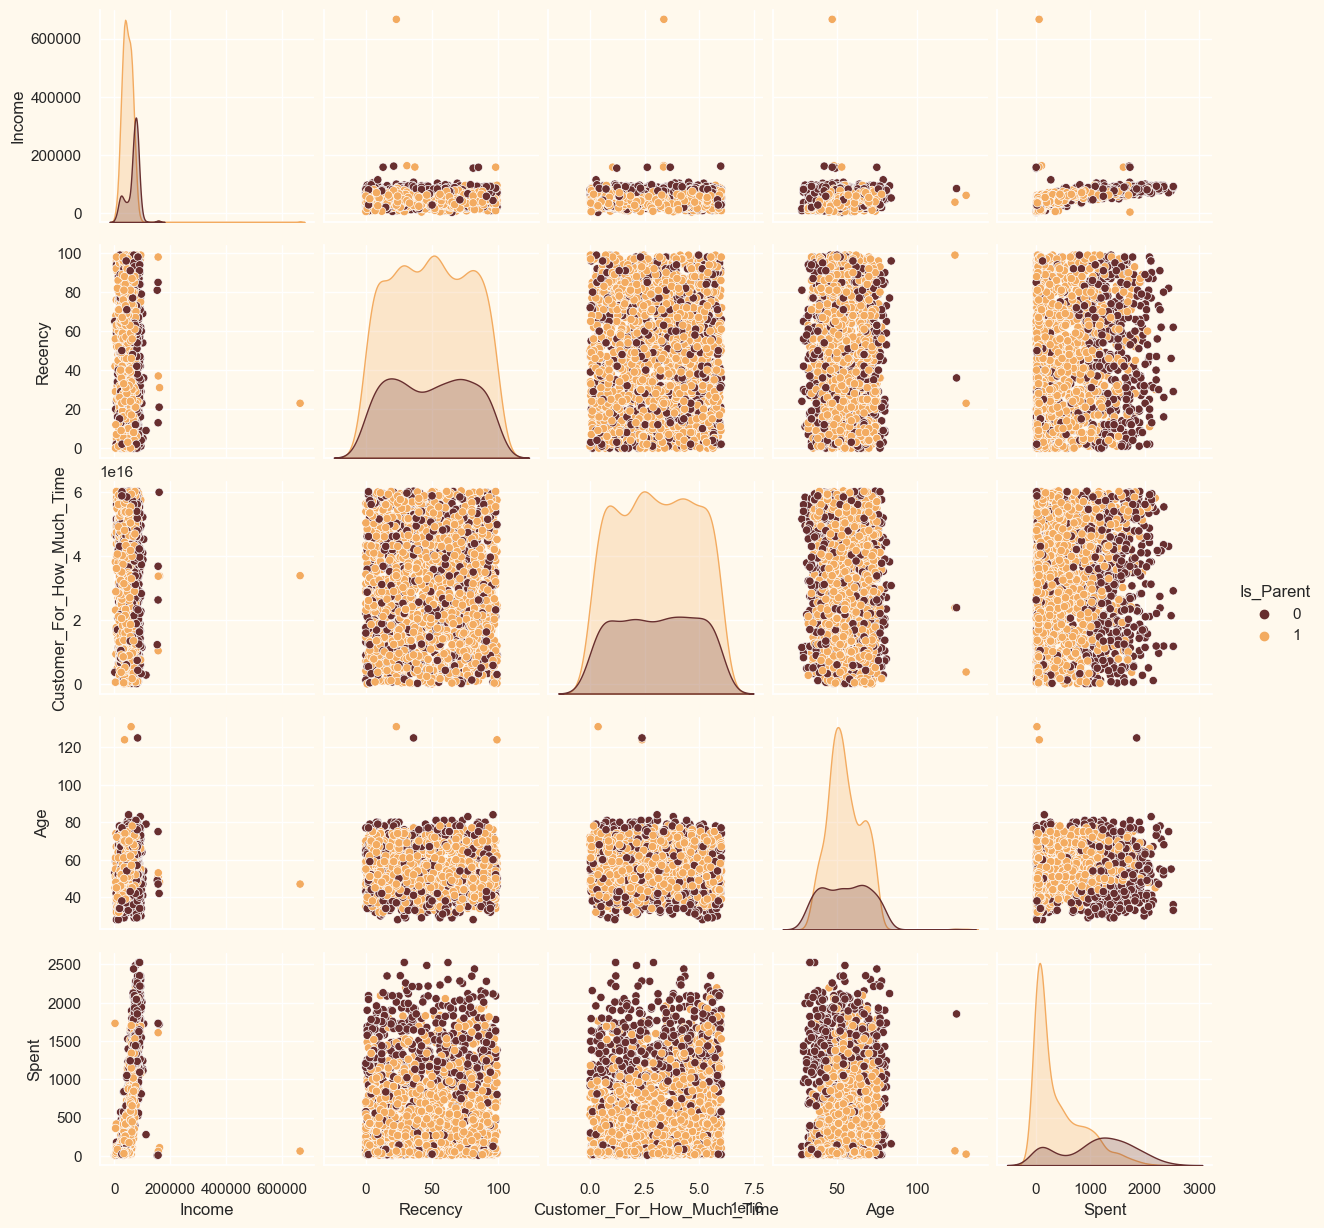

In [12]:
# to plot a few chosen features  
# establishing colour preferences  
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})  
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]  
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])  
#plotting the features that follow  
to_be_plotted = [ "Income", "Recency", "Customer_For_How_Much_Time", "Age", "Spent", "Is_Parent"]  
print("Relational Script of a Few Selected Features: A subset of data")  
plt.figure()  
sns.pairplot(dataset[to_be_plotted], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))  
#Taking hue  
plt.show()  

In [14]:
# removing the outliers by capping their income and age.  
dataset = dataset[(dataset["Age"]<90)]  
dataset = dataset[(dataset["Income"]<600000)]  
l=len(dataset)  
print( f"Following the elimination of the outliers, there are {l} numbers of data points:") 

Following the elimination of the outliers, there are 2212 numbers of data points:


<AxesSubplot:>

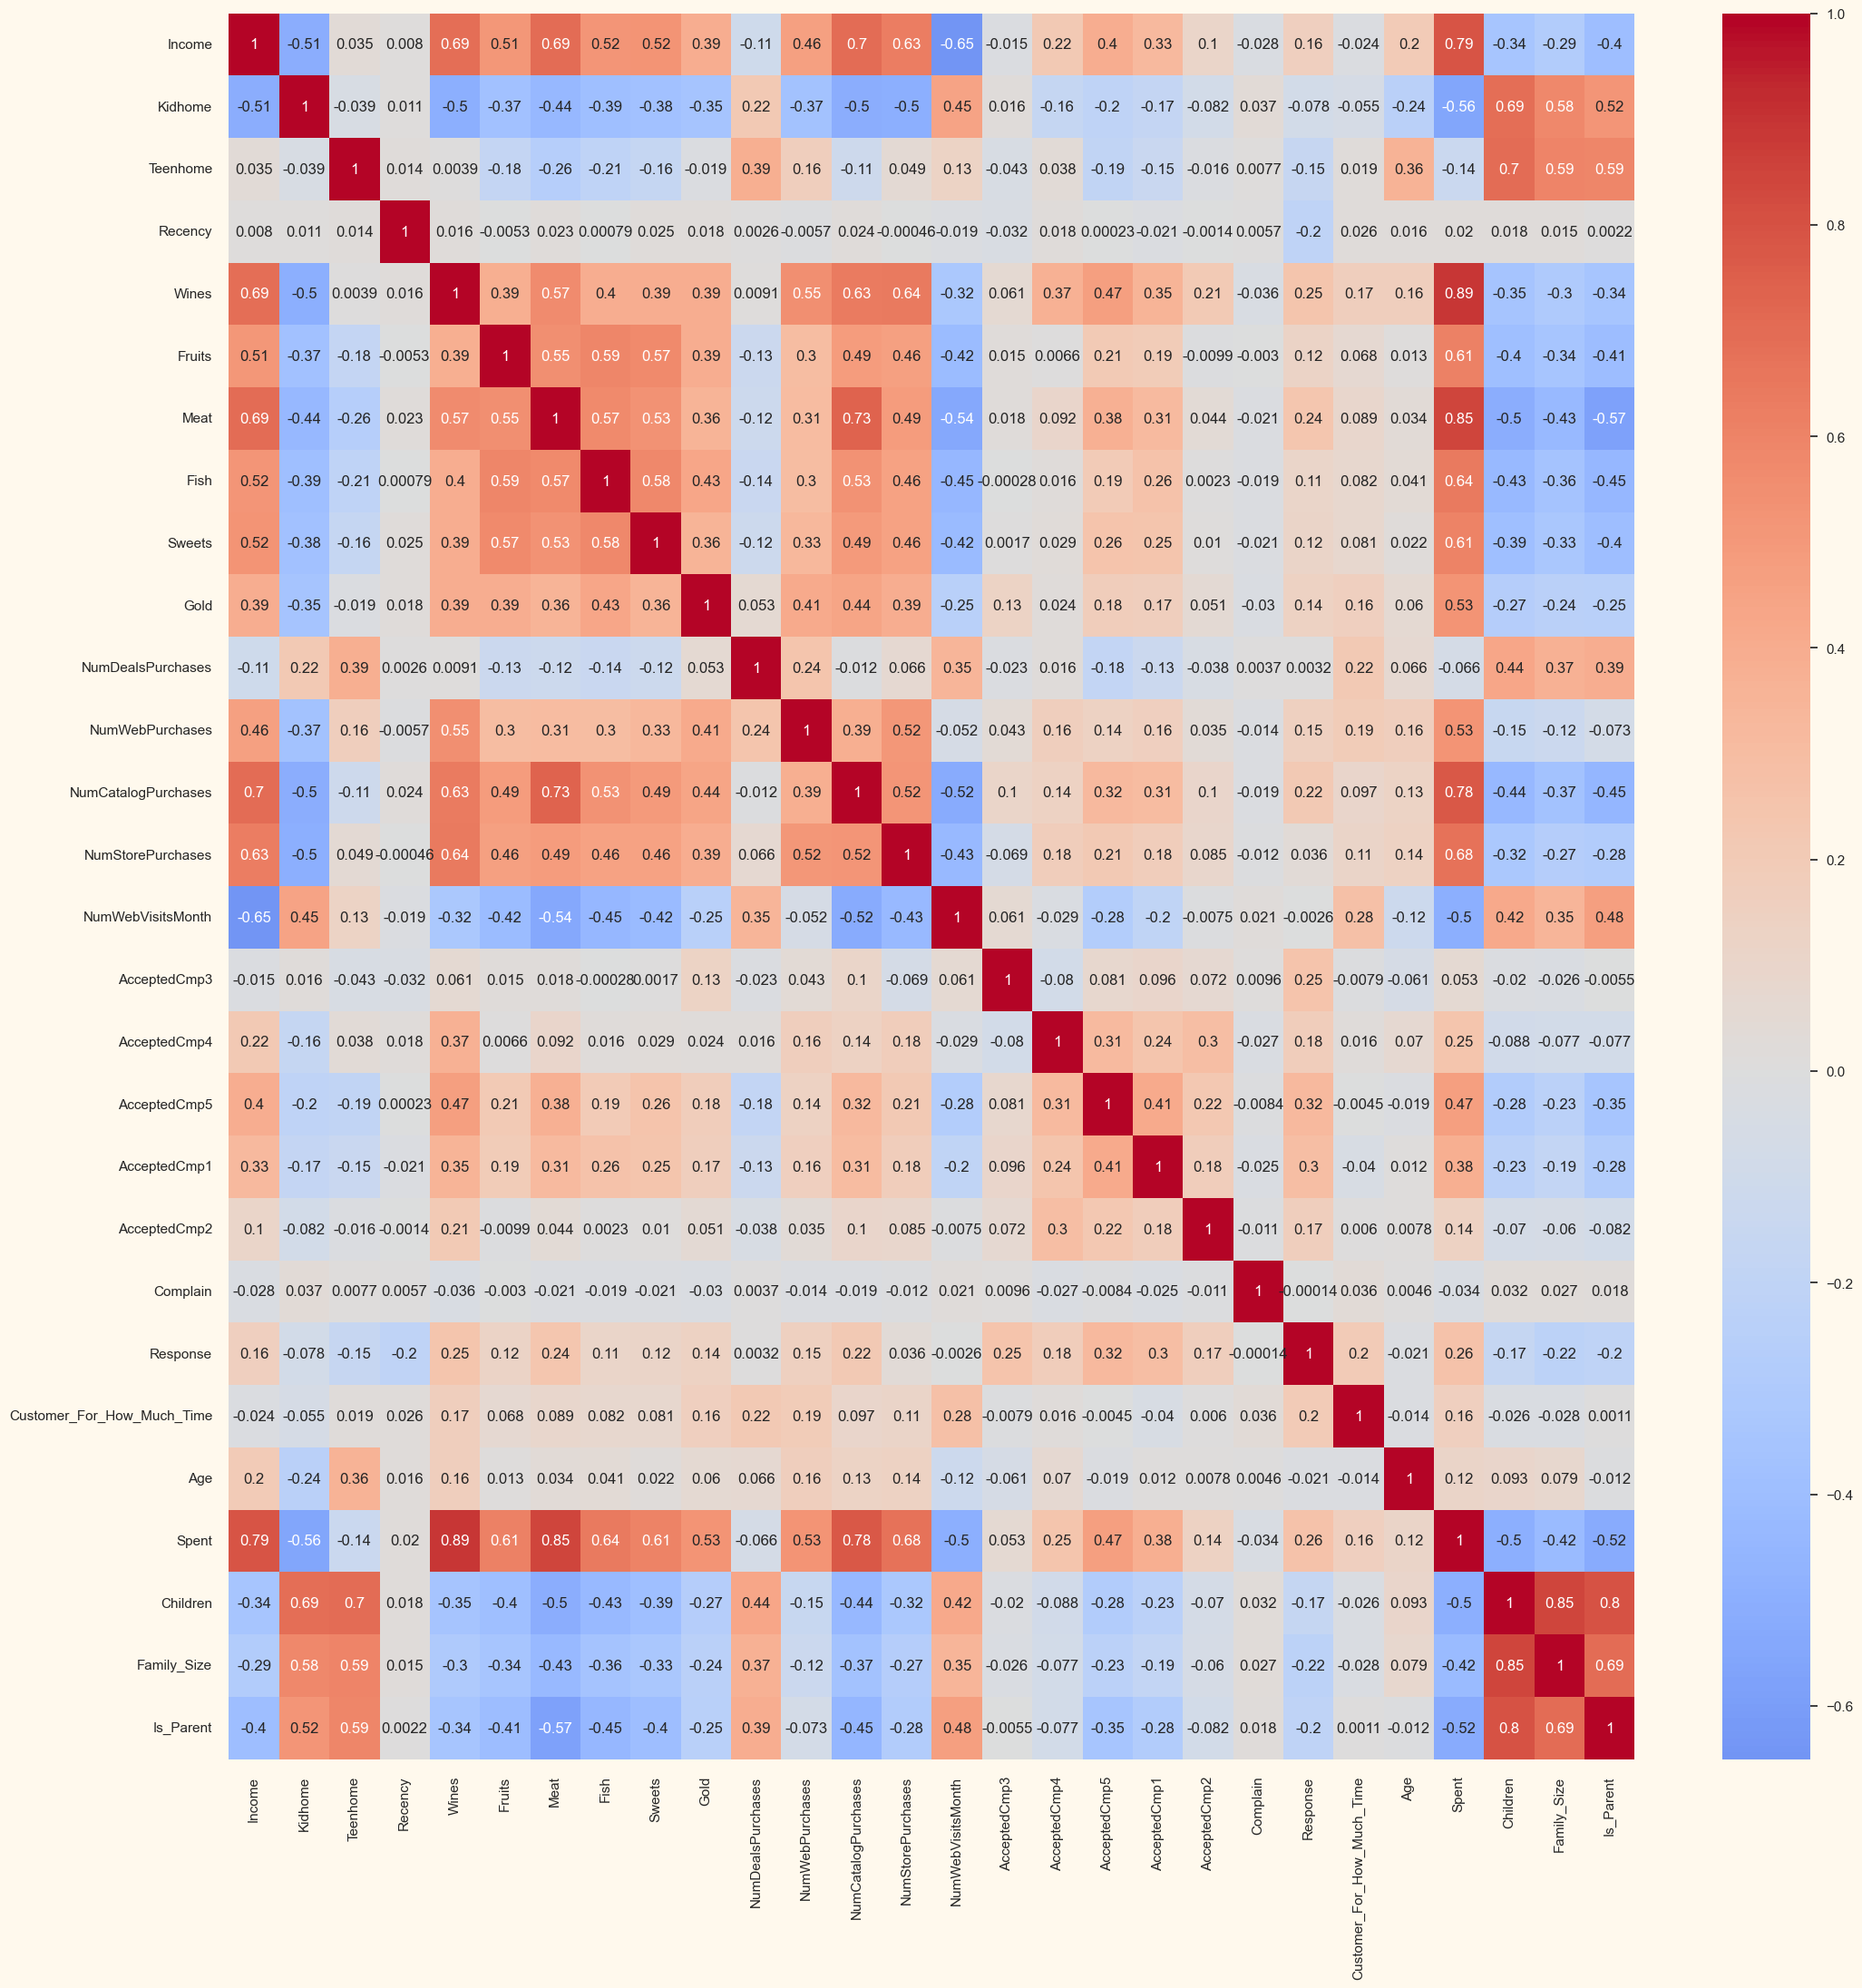

In [15]:
# correlation matrix  
corrmat = dataset.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)

## Data Preprocessing

In [16]:
# Obtain a list of the category variables  
s = (dataset.dtypes == 'object')  
object_columns = list(s[s].index)  
  
print("the dataset's categorical variables are:", object_columns)  

the dataset's categorical variables are: ['Education', 'Living_With']


In [17]:
# The object dtypes are label encoded.  
LE=LabelEncoder()  
for i in object_columns:  
    dataset[i]=dataset[[i]].apply(LE.fit_transform)  
     
print("Now, all attributes are numerical.")  

Now, all attributes are numerical.


In [18]:
# making a duplicate of the data  
copy_dataset = dataset.copy()  
# Removing the features on deals accepted and promotions to create a subset of the dataframe  
columns_to_delete = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']  
copy_dataset = copy_dataset.drop(columns_to_delete, axis=1)  
# Scaling  
standard_scaler = StandardScaler()  
standard_scaler.fit(copy_dataset)  
scaled_dataset = pd.DataFrame(standard_scaler.transform(copy_dataset),columns= copy_dataset.columns )  
print(" Now, every feature is scaled ")  

 Now, every feature is scaled 


In [19]:
# Using scaled data to reduce the dimensionality  
print("Dataframe to be applied in further modelling:")  
scaled_dataset.head()  

Dataframe to be applied in further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For_How_Much_Time       Age     Spent  \
0           0.692181                    1.527721  1.018352  1.676245   
1          -0.132545                   -1.189011  1.274785 -0.963297   
2          -0.544908                   -0.206048  0.334530  0.280110   
3           0.279818                   -1.060584 -1.289547 -0.920135   
4          -0.132545                   -0.951915 -1.033114 -0.307562   

   Living_With  Children  Family_Size  Is_Parent  
0    -1.349603 -1.264598    -1.758359  -1.581139  
1    -1.349603  1.404572     0.449070   0.632456  
2     0.740959 -1.264598    -0.654644  -1.581139  
3     0.740959  0.069987     0.449070   0.632456  
4     0.740959  0.069987     0.449070   0.632456  

[5 rows x 23 columns]

## Dimensionality Reduction

#### PCA-based dimension reduction
#### Graphing the compressed dataframe

In [24]:
#Initiating PCA to reduce dimensions, aka features, to 3  
pca = PCA(n_components=3)  
pca.fit(scaled_dataset)  
PCA_dataset = pd.DataFrame(pca.transform(scaled_dataset), columns=(["col1","col2", "col3"]))  
PCA_dataset.describe().T  

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -7.247568e-17  2.878602 -5.978126 -2.539470 -0.781595  2.386380   
col2  2212.0  4.657717e-17  1.709469 -4.194821 -1.323867 -0.173593  1.234838   
col3  2212.0  5.973974e-17  1.231686 -3.625423 -0.853216 -0.050749  0.863476   

           max  
col1  7.452915  
col2  6.168119  
col3  6.753252

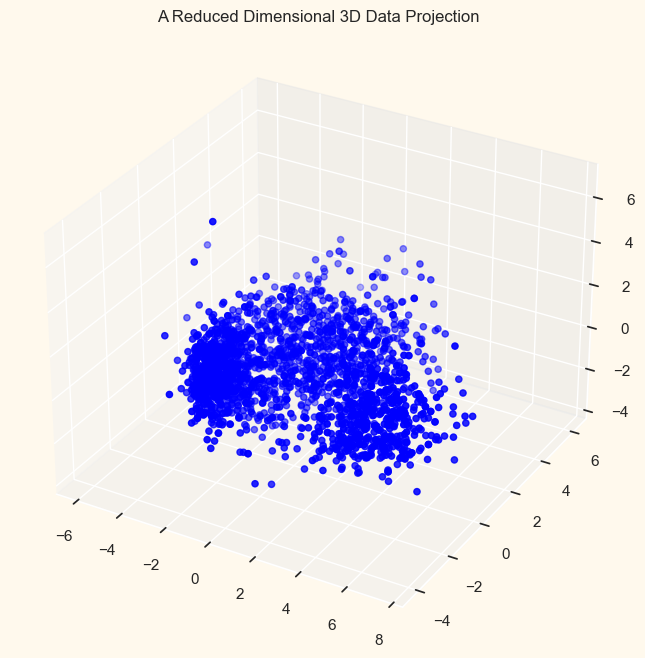

In [25]:
#A Reduced Dimensional 3D Data Projection  
x =PCA_dataset["col1"]  
y =PCA_dataset["col2"]  
z =PCA_dataset["col3"]  
# To plot  
fig = plt.figure(figsize=(10,8))  
ax = fig.add_subplot(111, projection="3d")  
ax.scatter(x,y,z, c="blue", marker="o" )  
ax.set_title("A Reduced Dimensional 3D Data Projection")  
plt.show()  

## Clustering

#### Determine the number of clusters to build using the elbow method.
#### Agglomerative Clustering for Clustering
#### examining the scatter plot clusters that were created

The amount of clusters to generate will be determined using the elbow method:


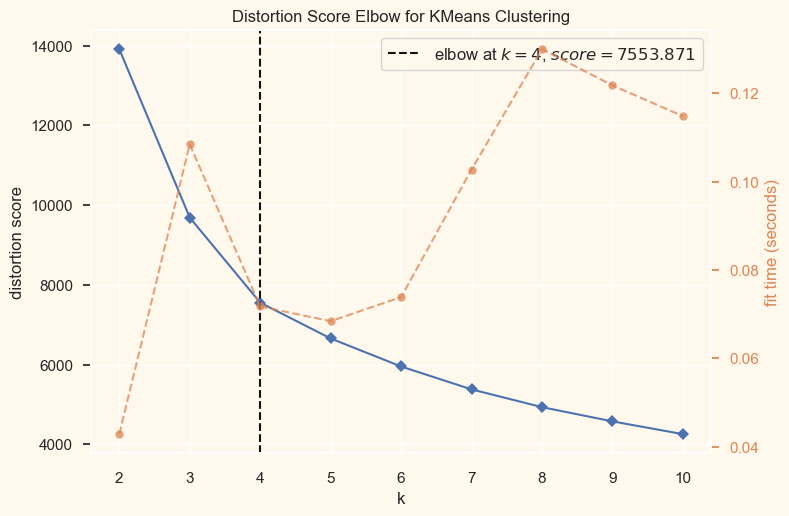

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Elbow technique to determine how many clusters to create.  
print('The amount of clusters to generate will be determined using the elbow method:')  
Elbow_method = KElbowVisualizer(KMeans(), k=10)  
Elbow_method.fit(PCA_dataset)  
Elbow_method.show()  

In [27]:
# Agglomerative Clustering model launch  
aggCluster = AgglomerativeClustering(n_clusters=4)  
# model fitting and cluster prediction  
yhat_aggCluster = aggCluster.fit_predict(PCA_dataset)  
PCA_dataset["Clusters"] = yhat_aggCluster  
# The original dataframe is updated with the Clusters feature.  
dataset["Clusters"]= yhat_aggCluster  

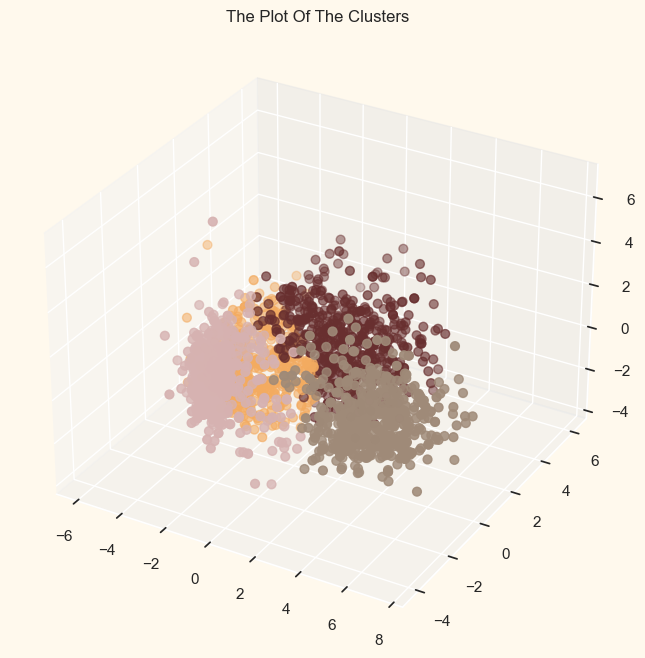

In [28]:
# Plotting the clusters  
fig = plt.figure(figsize=(10,8))  
ax = plt.subplot(111, projection='3d', label="bla")  
ax.scatter(x, y, z, s=40, c=PCA_dataset["Clusters"], marker='o', cmap = cmap )  
ax.set_title("The Plot Of The Clusters")  
plt.show()  

## Evaluation Models

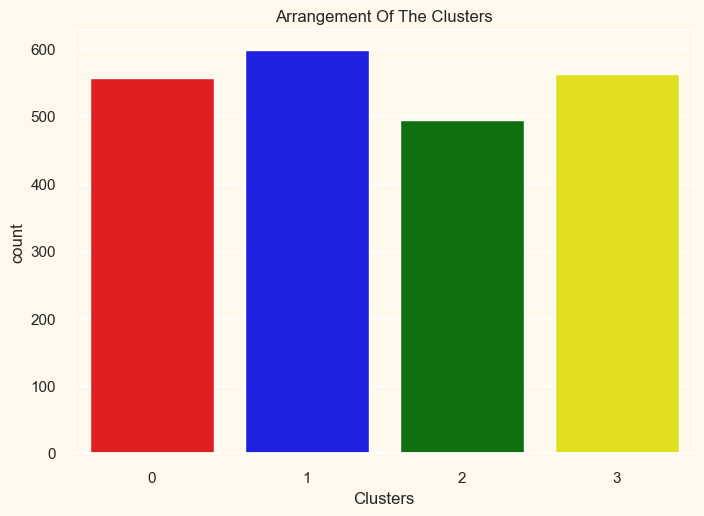

In [29]:
#Plotting countplot of clusters  
pal = ["red","blue", "green","yellow"]  
pl = sns.countplot(x=dataset["Clusters"], palette= pal)  
pl.set_title("Arrangement Of The Clusters")  
plt.show()  

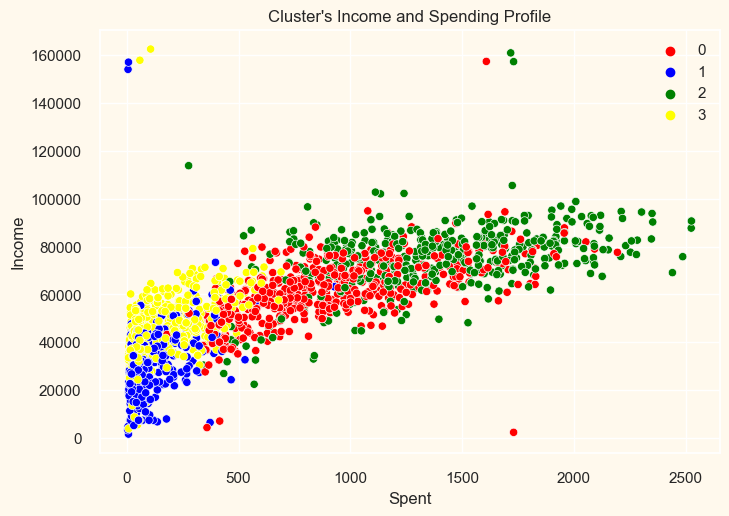

In [31]:
pl = sns.scatterplot(data = dataset,x=dataset["Spent"], y=dataset["Income"],hue=dataset["Clusters"], palette= pal)  
pl.set_title("Cluster's Income and Spending Profile")  
plt.legend()  
plt.show()  

###### group 0: high expenditures and average earnings
###### group 1: high income and spending
###### group 2: low-income and low expenditure
###### group 3: High expenditure and poor income

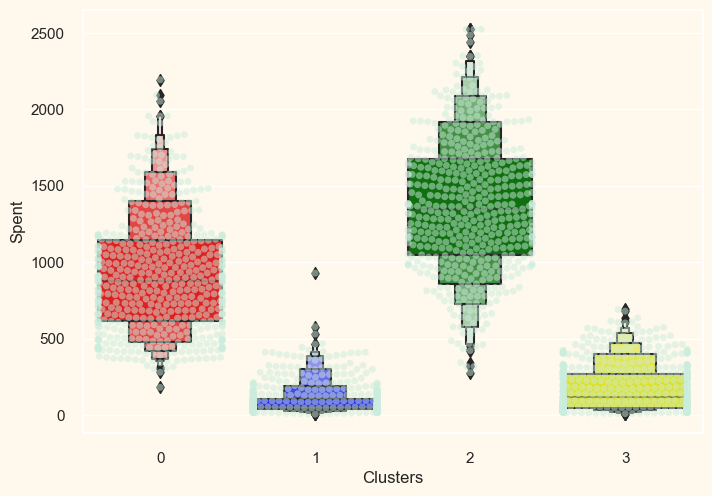

In [33]:
plt.figure()  
pl=sns.swarmplot(x=dataset["Clusters"], y=dataset["Spent"], color= "#CBEDDD", alpha=0.5 )  
pl=sns.boxenplot(x=dataset["Clusters"], y=dataset["Spent"], palette=pal)  
plt.show()  

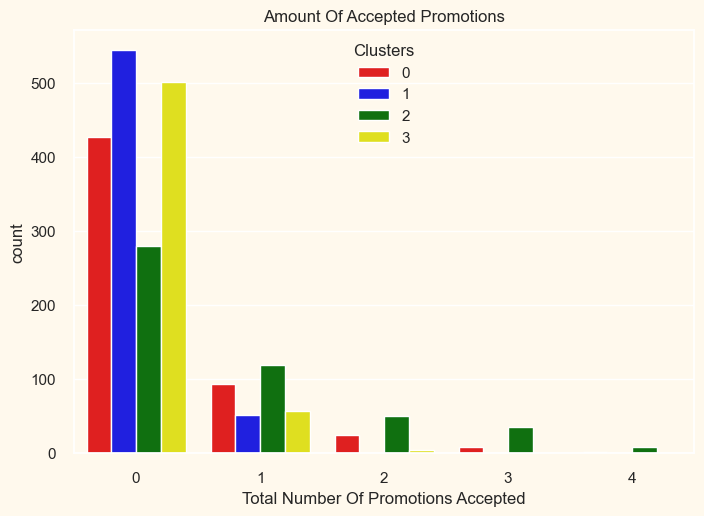

In [35]:
# Adding a tool to calculate the total number of approved promotions  
dataset["Total_Promos"] = dataset["AcceptedCmp1"]+ dataset["AcceptedCmp2"]+ dataset["AcceptedCmp3"]+ dataset["AcceptedCmp4"]+ dataset["AcceptedCmp5"]  
# Plotting the number of accepted campaigns overall.  
plt.figure()  
pl = sns.countplot(x=dataset["Total_Promos"],hue=dataset["Clusters"], palette= pal)  
pl.set_title("Amount Of Accepted Promotions")  
pl.set_xlabel("Total Number Of Promotions Accepted")  
plt.show()  

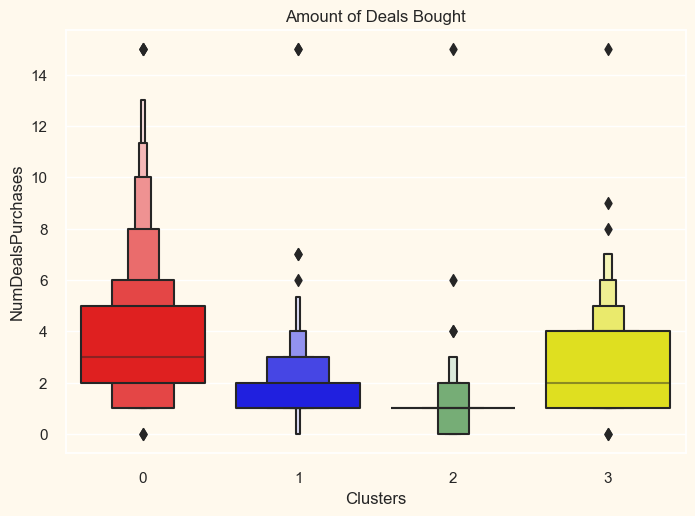

In [37]:
#Graphing the number of deals bought  
plt.figure()  
pl=sns.boxenplot(y=dataset["NumDealsPurchases"],x=dataset["Clusters"], palette= pal)  
pl.set_title("Amount of Deals Bought")  
plt.show()  

<Figure size 800x550 with 0 Axes>

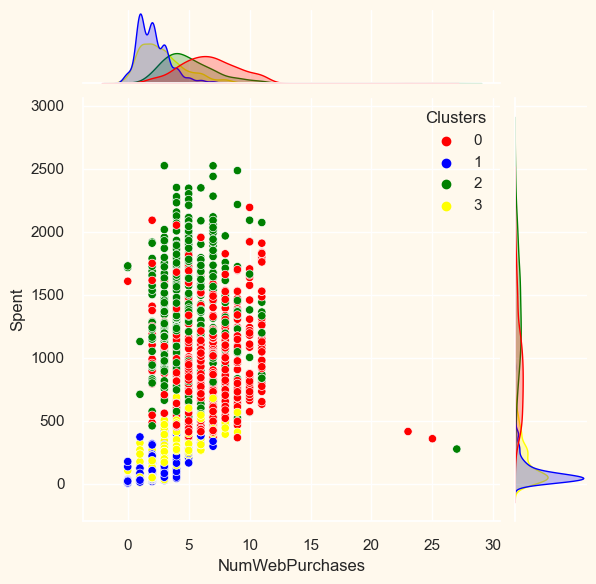

<Figure size 800x550 with 0 Axes>

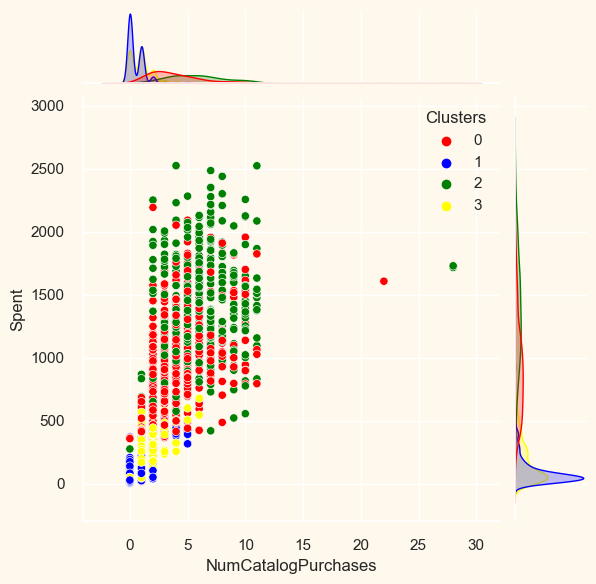

<Figure size 800x550 with 0 Axes>

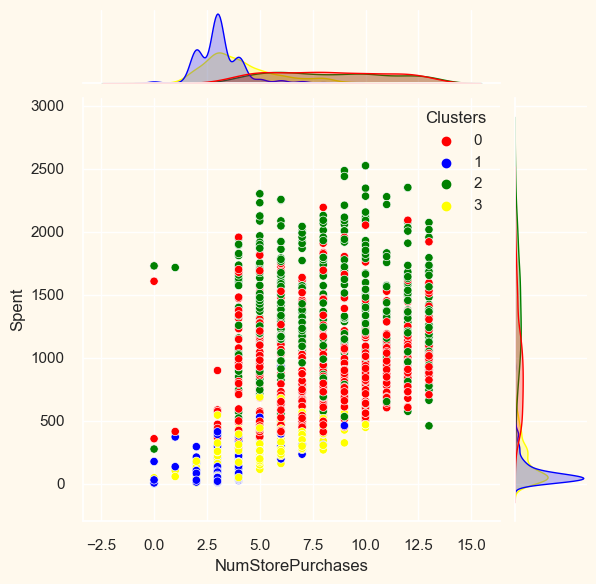

<Figure size 800x550 with 0 Axes>

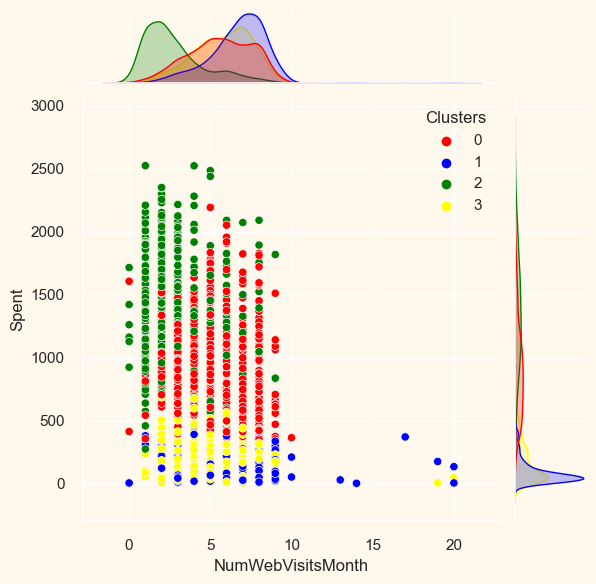

In [40]:
#for more details on the purchasing style  
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"]  
  
for i in Places:  
    plt.figure()  
    sns.jointplot(x=dataset[i],y = dataset["Spent"],hue=dataset["Clusters"], palette= pal)  
    plt.show()  

## Profiling

<Figure size 800x550 with 0 Axes>

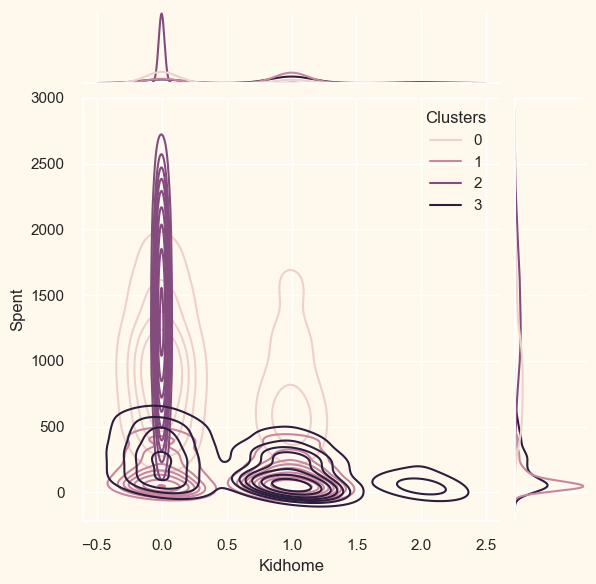

<Figure size 800x550 with 0 Axes>

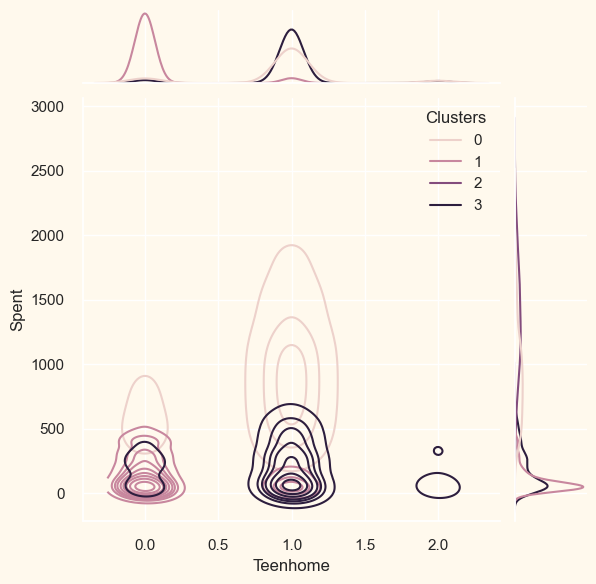

<Figure size 800x550 with 0 Axes>

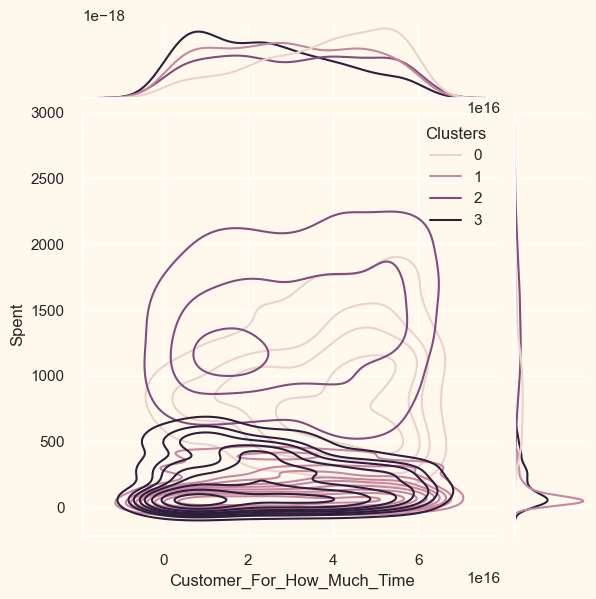

<Figure size 800x550 with 0 Axes>

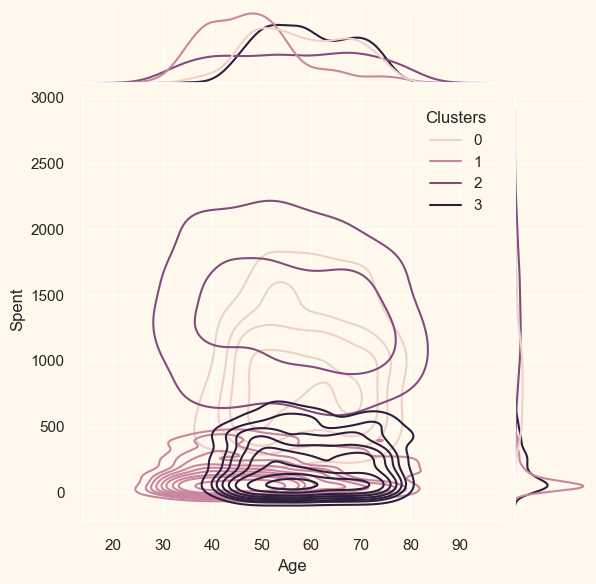

<Figure size 800x550 with 0 Axes>

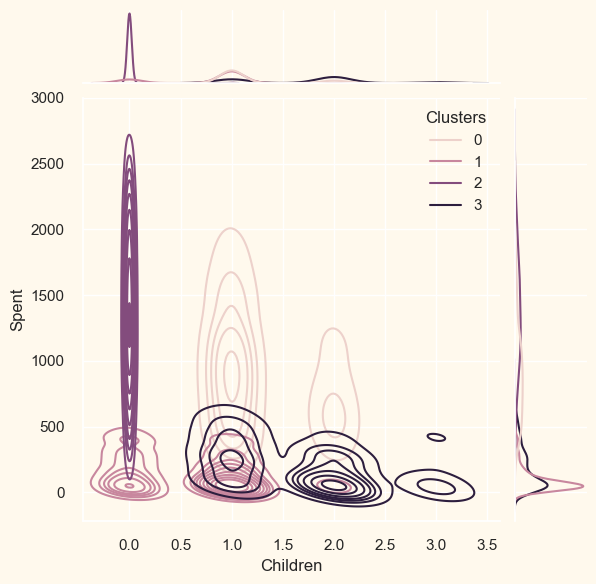

<Figure size 800x550 with 0 Axes>

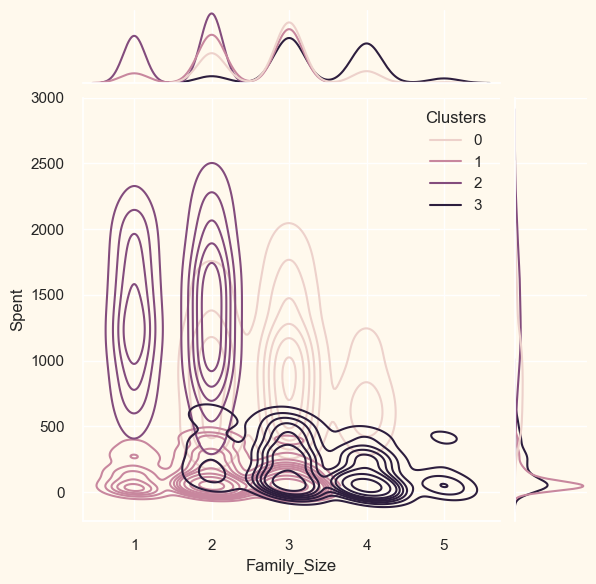

<Figure size 800x550 with 0 Axes>

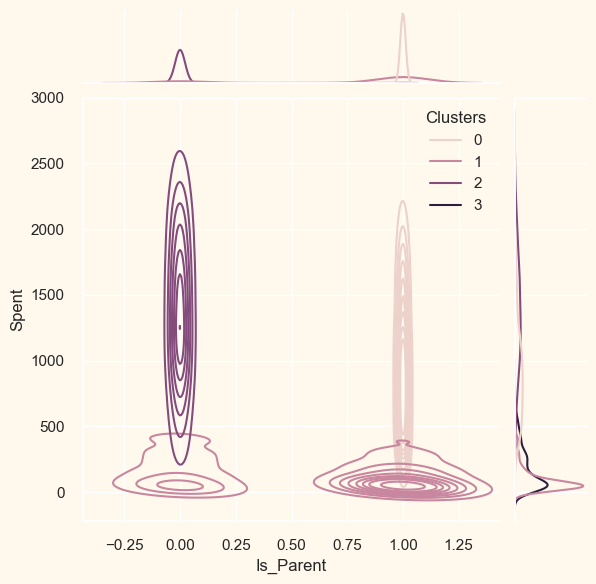

<Figure size 800x550 with 0 Axes>

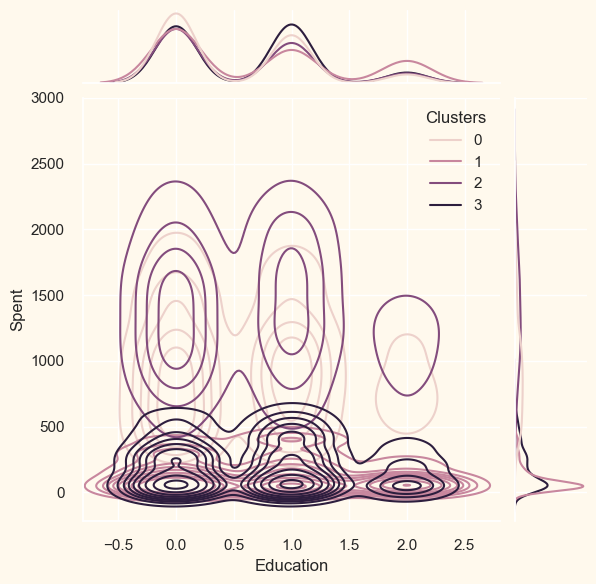

<Figure size 800x550 with 0 Axes>

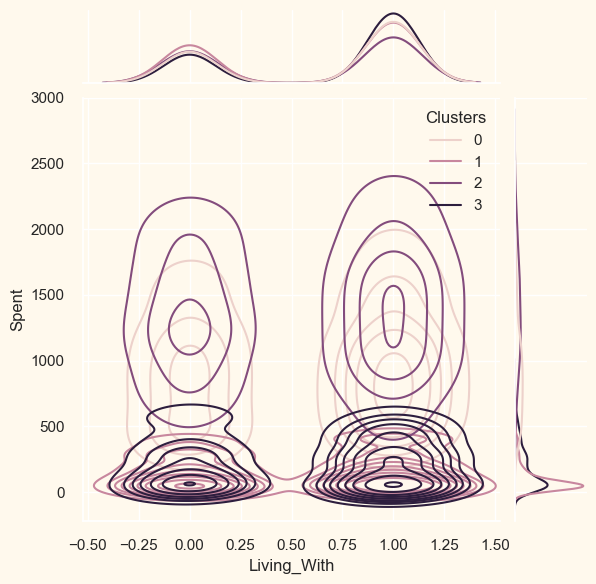

In [41]:
Personal = [ "Kidhome","Teenhome","Customer_For_How_Much_Time", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]  
  
for i in Personal:  
    plt.figure()  
    sns.jointplot(x=dataset[i], y=dataset["Spent"], hue =dataset["Clusters"], kind="kde", palpalette=pal)  
    plt.show()  

## Observation

###### Cluster Number 0:
    Are definitely a parent
    At the max, have four members in the family and at least 2
    Single parents are a subset of this group
    Most have a teenager at home
    Relatively older
    
###### Cluster Number 1 :
    Are a definitely not a parent
    At the max are only two members in the family
    A slight majority of couples over single people
    Span all ages
    A high-income groups
    
###### Cluster Number 2:
    The majority of these people are parents
    At the max are three members in the family
    They majorly have one kind(and not teenagers, typically)
    Relatively younger
    
###### Cluster Number 3:
    They are definitely a parent
    At the max are five members in the family and at least 2
    The majority of them have a teenager at home
    Relatively older
    A lower-income group
    

## Unsupervised Clustering was done. Dimensionality reduction and agglomerative Clustering were both used. We developed four clusters and utilized them to profile clients in clusters based on their family configurations, income levels, and spending habits.